### 모두를 위한 머신러닝/딥러닝 강의
김성훈 교수님의 모두를 위한 머신러닝/딥러닝 강의 중 lab 강의 코드입니다.
## Lab11_2 CNN MNIST
simple structure : Conv1 - Max pooling - Conv2 - Max pooling - fully-connected

In [1]:
import os, sys
import tensorflow as tf
import numpy as np 
import random
import matplotlib.pylab as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Data structures and algorithms_warm_up.ipynb',
 'Data structures and algorithms_week_1.ipynb',
 'DLEL',
 'DLEL.zip',
 'DLEL_10_1_accuracy_loss.PNG',
 'DLEL_10_1_activation_histogram.PNG',
 'DLEL_10_1_example_graph.PNG',
 'DLEL_10_1_Weight_initialization.ipynb',
 'DLEL_10_2_Drop_out.ipynb',
 'DLEL_11_2_CNN_MNIST.ipynb',
 'logs',
 'MNIST_data',
 'py-automate',
 'untitled.txt']

In [3]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets(train_dir = './MNIST_data/', one_hot = True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# graph setting
X = tf.placeholder(dtype = tf.float32, shape = [None, 784])
Ximg = tf.reshape(tensor = X, shape = [-1,28,28,1])
Y = tf.placeholder(dtype = tf.float32, shape = [None, 10])

# conv1 layer
with tf.variable_scope('conv1_layer'):
    filter_weight1 = tf.get_variable(name = 'weight1', shape = [3,3,1,32], initializer = tf.contrib.layers.xavier_initializer())
    conv1 = tf.nn.conv2d(input = Ximg, filter = filter_weight1, strides = [1,1,1,1], padding = 'SAME')
    relu1 = tf.nn.relu(features = conv1)

# pool1 layer
with tf.variable_scope('pool1_layer'):
    pooled1 = tf.nn.max_pool(value = relu1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

# conv2 layer
with tf.variable_scope('conv2_layer'):
    filter_weight2 = tf.get_variable(name = 'weight2', shape = [3,3,32,64], initializer = tf.contrib.layers.xavier_initializer())
    conv2 = tf.nn.conv2d(input = pooled1, filter = filter_weight2, strides = [1,1,1,1], padding = 'SAME')
    relu2 = tf.nn.relu(features = conv2)

# pool2 layer
with tf.variable_scope('pool2_layer'):
    pooled2 = tf.nn.max_pool(value = relu2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

# fully_connected layer
with tf.variable_scope('fully-connected_layer'):
    pooled_vector = tf.reshape(tensor = pooled2, shape = [-1, 7 * 7 * 64])
    fully_weight = tf.get_variable(name = 'fully_weight', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
    b = tf.Variable(initial_value = tf.random_normal(shape = [10]), name = 'bias')
    score = tf.matmul(pooled_vector, fully_weight) + b
    
# loss
with tf.variable_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = score))

# train
with tf.variable_scope('train'):
    train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
    
# accuracy
with tf.variable_scope('accuracy'):
    is_correct = tf.cast(tf.equal(tf.argmax(score, axis = 1), tf.argmax(Y, axis = 1)), dtype = tf.float32)
    accuracy = tf.reduce_mean(is_correct)

epoch :    0, tr_loss : 0.274, tr_acc : 99.00%, val_loss : 0.258, val_acc : 97.34%
test accuracy : 97.42%
epoch :    1, tr_loss : 0.067, tr_acc : 99.00%, val_loss : 0.066, val_acc : 98.44%
test accuracy : 98.29%
epoch :    2, tr_loss : 0.049, tr_acc : 99.00%, val_loss : 0.051, val_acc : 98.64%
test accuracy : 98.69%
epoch :    3, tr_loss : 0.039, tr_acc : 98.00%, val_loss : 0.048, val_acc : 98.52%
test accuracy : 98.49%
epoch :    4, tr_loss : 0.032, tr_acc : 100.00%, val_loss : 0.043, val_acc : 98.86%
test accuracy : 98.78%
epoch :    5, tr_loss : 0.027, tr_acc : 100.00%, val_loss : 0.041, val_acc : 98.78%
test accuracy : 98.86%
epoch :    6, tr_loss : 0.023, tr_acc : 99.00%, val_loss : 0.041, val_acc : 98.64%
test accuracy : 98.79%
epoch :    7, tr_loss : 0.020, tr_acc : 96.00%, val_loss : 0.040, val_acc : 98.80%
test accuracy : 98.63%
epoch :    8, tr_loss : 0.017, tr_acc : 99.00%, val_loss : 0.039, val_acc : 99.06%
test accuracy : 99.03%
epoch :    9, tr_loss : 0.014, tr_acc : 98.0

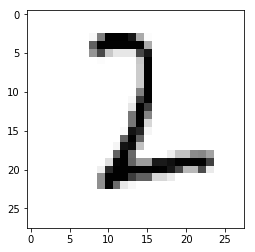

In [5]:
# parameter setting
batch_size = 100
epochs = 15
tr_loss_history = []
tr_acc_history = []
val_loss_history = []
val_acc_history = []

# launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        avg_tr_loss = 0
        avg_val_loss = 0

        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            tr_loss, _ = sess.run([loss, train], feed_dict = {X : batch_xs, Y : batch_ys})
            val_loss = sess.run(loss, feed_dict = {X : mnist.validation.images, Y : mnist.validation.labels})
            avg_tr_loss += tr_loss / total_batch
            avg_val_loss += val_loss / total_batch
        
        tr_acc = sess.run(accuracy, feed_dict = {X : batch_xs, Y : batch_ys})
        val_acc = sess.run(accuracy, feed_dict = {X : mnist.validation.images, Y : mnist.validation.labels})
        
        tr_loss_history.append(avg_tr_loss)
        tr_acc_history.append(tr_acc)
        val_loss_history.append(avg_val_loss)
        val_acc_history.append(val_acc)
        
        print('epoch : {:4}, tr_loss : {:.3f}, tr_acc : {:.2%}, val_loss : {:.3f}, val_acc : {:.2%}'.format(epoch, avg_tr_loss,
                                                                                                               tr_acc, avg_val_loss,
                                                                                                               val_acc))
    
        print('test accuracy : {:.2%}'.format(sess.run(accuracy, feed_dict = {X : mnist.test.images, Y : mnist.test.labels})))
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples - 1)
    print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction : ', sess.run(tf.argmax(score, axis = 1), feed_dict = {X : mnist.test.images[r:r+1]}))
   
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')

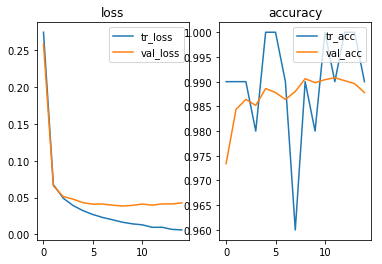

In [6]:
fig = plt.figure()
loss_history = fig.add_subplot(1,2,1)
loss_history.plot(tr_loss_history, label = 'tr_loss')
loss_history.plot(val_loss_history, label = 'val_loss')
loss_history.title.set_text('loss')
loss_history.legend(loc = 'upper right')

acc_history = fig.add_subplot(1,2,2)
acc_history.plot(tr_acc_history, label = 'tr_acc')
acc_history.plot(val_acc_history, label = 'val_acc')
acc_history.title.set_text('accuracy')
acc_history.legend(loc = 'upper right')